# Handwriting recognition

Lag en modell med prediktoren f (x) = softmax(xW + b) som klassifiserer handskrevne tall. Se mnist for eksempel lasting av MNIST datasettet, og visning og lagring av en observasjon. Du skal oppnå en nøyaktighet på 0.9 eller over. Lag 10 .png bilder som viser W etter optimalisering.


tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


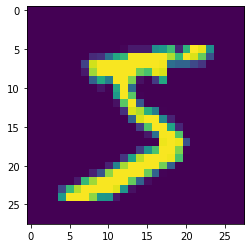

In [50]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Load observations from the mnist dataset. The observations are divided into a training set and a test set
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True)
x_train = mnist_train.data.reshape(-1, 784).float()  # Reshape input
y_train = torch.zeros((mnist_train.targets.shape[0], 10))  # Create output tensor
y_train[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True)
x_test = mnist_test.data.reshape(-1, 784).float()  # Reshape input
y_test = torch.zeros((mnist_test.targets.shape[0], 10))  # Create output tensor
y_test[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1  # Populate output

# Show the input of the first observation in the training set
plt.imshow(x_train[0, :].reshape(28, 28))

# Print the classification of the first observation in the training set
print(y_train[0, :])

# Save the input of the first observation in the training set
plt.imsave('x_train_1.png', x_train[0, :].reshape(28, 28))

plt.show()


In [51]:
# Model
class SoftmaxModel:

    def __init__(self):
        # Model variables
        w = torch.zeros([784, 10]).float() + 1.1
        b = torch.zeros([1,10]).float() - 1.0
        self.W = w.clone().detach().requires_grad_(True)
        self.b = b.clone().detach().requires_grad_(True)

    def logits(self, x):
        return torch.Tensor(x) @ self.W + self.b

    # Predictor
    def f(self, x):
        return torch.softmax(self.logits(x))

    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [52]:
# Optimization
model = SoftmaxModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.01)

for epoch in range(1000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("W[0][0] = %s" % model.W[0][0])
print("b = %s" % model.b)
print("Loss = %s" % model.loss(x_train, y_train))

W[0][0] = tensor(1.1000, grad_fn=<SelectBackward0>)
b = tensor([[-1.0220, -1.0154, -1.0206, -1.0224, -1.0185, -1.0160, -1.0194, -1.0153,
         -1.0345, -1.0233]], requires_grad=True)
Loss = tensor(25.8346, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
